In [55]:
from sklearn.model_selection import train_test_split
from preamble import *
import pydotplus
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import pprint
import matplotlib as plt
import mglearn
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.cross_validation import KFold

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


In [56]:

df = pd.read_csv("C:/Users/Kapila/Desktop/Macquarie coursework/COMP777 Computing Methods of Research/Final Project/Dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv") #Reading the dataset in a dataframe using Pandas

df.loc[df['shares'] <= 1400, 'split'] = 0
df.loc[df['shares'] > 1400, 'split'] = 1

df['split']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        0.0
10       1.0
11       1.0
12       0.0
13       1.0
14       0.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       0.0
22       0.0
23       1.0
24       0.0
25       0.0
26       1.0
27       1.0
28       0.0
29       0.0
        ... 
39614    0.0
39615    1.0
39616    1.0
39617    0.0
39618    0.0
39619    0.0
39620    1.0
39621    1.0
39622    1.0
39623    0.0
39624    1.0
39625    0.0
39626    0.0
39627    0.0
39628    0.0
39629    1.0
39630    1.0
39631    0.0
39632    1.0
39633    1.0
39634    0.0
39635    0.0
39636    1.0
39637    0.0
39638    0.0
39639    1.0
39640    1.0
39641    1.0
39642    0.0
39643    0.0
Name: split, Length: 39644, dtype: float64

In [57]:
df.shape


(39644, 62)

In [58]:
#removing the attributes url and timedelta which are non predictive variables
dfr12 = df.iloc[:, 2:60]
print(dfr12)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               219             0.66               1.0   
1                   9               211             0.58               1.0   
2                   9               255             0.60               1.0   
3                   9               531             0.50               1.0   
4                  13              1072             0.42               1.0   
5                  10               370             0.56               1.0   
6                   8               960             0.42               1.0   
7                  12               989             0.43               1.0   
8                  11                97             0.67               1.0   
9                  10               231             0.64               1.0   
10                  9              1248             0.49               1.0   
11                 10               187             0.67        

In [59]:
#removing the attributes url and timedelta which are non predictive variables and retaining no of shares for plotting
dfshares = df.iloc[:, 2:61]
print(dfshares)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               219             0.66               1.0   
1                   9               211             0.58               1.0   
2                   9               255             0.60               1.0   
3                   9               531             0.50               1.0   
4                  13              1072             0.42               1.0   
5                  10               370             0.56               1.0   
6                   8               960             0.42               1.0   
7                  12               989             0.43               1.0   
8                  11                97             0.67               1.0   
9                  10               231             0.64               1.0   
10                  9              1248             0.49               1.0   
11                 10               187             0.67        

In [60]:
data=dfr12

In [61]:
data.head()
data.shape[1]
data.columns.values

array(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rat

In [62]:
target=  df.iloc[:,61]

In [63]:
target.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: split, dtype: float64

In [64]:
print(target)

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        0.0
10       1.0
11       1.0
12       0.0
13       1.0
14       0.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       0.0
22       0.0
23       1.0
24       0.0
25       0.0
26       1.0
27       1.0
28       0.0
29       0.0
        ... 
39614    0.0
39615    1.0
39616    1.0
39617    0.0
39618    0.0
39619    0.0
39620    1.0
39621    1.0
39622    1.0
39623    0.0
39624    1.0
39625    0.0
39626    0.0
39627    0.0
39628    0.0
39629    1.0
39630    1.0
39631    0.0
39632    1.0
39633    1.0
39634    0.0
39635    0.0
39636    1.0
39637    0.0
39638    0.0
39639    1.0
39640    1.0
39641    1.0
39642    0.0
39643    0.0
Name: split, Length: 39644, dtype: float64


In [65]:
print("Type of data: {}".format(type(df)))
print("Type of data: {}".format(type(data)))
print("Type of data: {}".format(type(target)))

Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.series.Series'>


In [66]:
from sklearn.model_selection import train_test_split
X_traingp, X_testgp, y_traingp, y_testgp = train_test_split(
    dfshares, target, random_state=0)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [68]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (29733, 58)
y_train shape: (29733,)


In [69]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (9911, 58)
y_test shape: (9911,)


In [70]:
print("X_train shape: {}".format(X_train.shape))
print(len(X_train.index))

X_train shape: (29733, 58)
29733


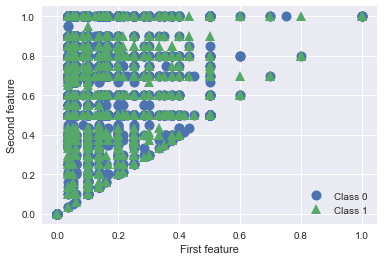

In [71]:
# plot dataset scatter plot sample
mglearn.discrete_scatter(X_train['min_positive_polarity'], X_train['max_positive_polarity'], y_train)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")



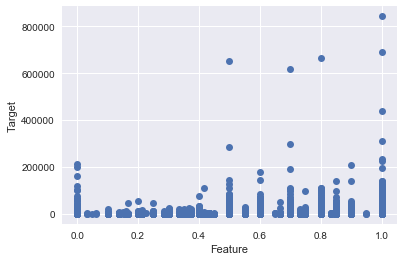

In [72]:
#use no of shares for plotting
plt.plot(X_traingp['max_positive_polarity'], X_traingp['shares'], 'o')

plt.xlabel("Feature")
plt.ylabel("Target")

In [73]:
#useful if using linear regression on data later plot page no 42
def plot_linear_regression():
   
    #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    line = np.linspace(-3, 3, 100).reshape(-1, 1)

    lr = LinearRegression().fit(X_train, y_train)
    print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))

    plt.figure(figsize=(8, 8))
    plt.plot(line, lr.predict(X_train))
    plt.plot(X_train, y_train, 'o', c=cm2(0))
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.set_ylim(-3, 3)
    ax.legend(["model", "training data"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')
    
    

In [74]:
#ploplot_linear_regression():
#plot_linear_regression()


In [75]:
#logistic regression:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
#The default value of C=1  provides quite good performance, with 95% accuracy on both the training
#and the test set. But as training and test set performance are very close, it is likely that we are underfitting. 
#Let’s try to increase C  to fit a more flexible model:

Training set score: 0.608
Test set score: 0.609


In [76]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.605
Test set score: 0.603


In [77]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.608
Test set score: 0.610


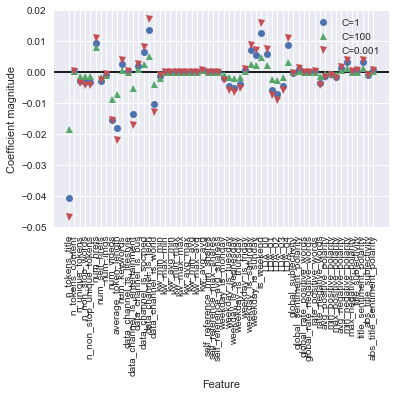

In [78]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(X_train.shape[1]), X_train.columns.values, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
#plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [79]:
data.head()
data.shape[1]
data.columns.values

array(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rat

In [80]:
data.shape[1]


58

In [81]:
print(logreg100.coef_.T)

[[-0.018]
 [ 0.   ]
 [-0.001]
 [-0.001]
 [-0.001]
 [ 0.008]
 [-0.002]
 [-0.001]
 [-0.009]
 [-0.007]
 [ 0.   ]
 [ 0.   ]
 [-0.005]
 [ 0.001]
 [ 0.002]
 [ 0.005]
 [-0.004]
 [-0.002]
 [ 0.   ]
 [-0.   ]
 [-0.   ]
 [-0.   ]
 [-0.   ]
 [-0.   ]
 [-0.   ]
 [ 0.001]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [-0.001]
 [-0.002]
 [-0.002]
 [-0.002]
 [ 0.   ]
 [ 0.003]
 [ 0.002]
 [ 0.005]
 [ 0.002]
 [-0.002]
 [-0.003]
 [-0.002]
 [ 0.003]
 [-0.   ]
 [ 0.   ]
 [ 0.   ]
 [-0.   ]
 [ 0.   ]
 [-0.001]
 [-0.001]
 [-0.   ]
 [-0.001]
 [ 0.001]
 [ 0.001]
 [ 0.   ]
 [ 0.   ]
 [ 0.001]
 [-0.   ]
 [ 0.   ]]


Training accuracy of l1 logreg with C=0.001: 0.60
Test accuracy of l1 logreg with C=0.001: 0.60
Training accuracy of l1 logreg with C=1.000: 0.65
Test accuracy of l1 logreg with C=1.000: 0.65
Training accuracy of l1 logreg with C=100.000: 0.65
Test accuracy of l1 logreg with C=100.000: 0.65


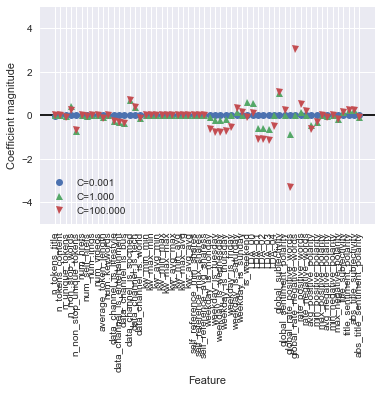

In [82]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(X_train.shape[1]), X_train.columns.values, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

In [83]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.580


In [84]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.636
Accuracy on test set: 0.627


In [85]:
export_graphviz(tree, out_file="tree.dot", class_names=["Unpopular", "Popular"],
                feature_names=X_train.columns.values, impurity=False, filled=True)

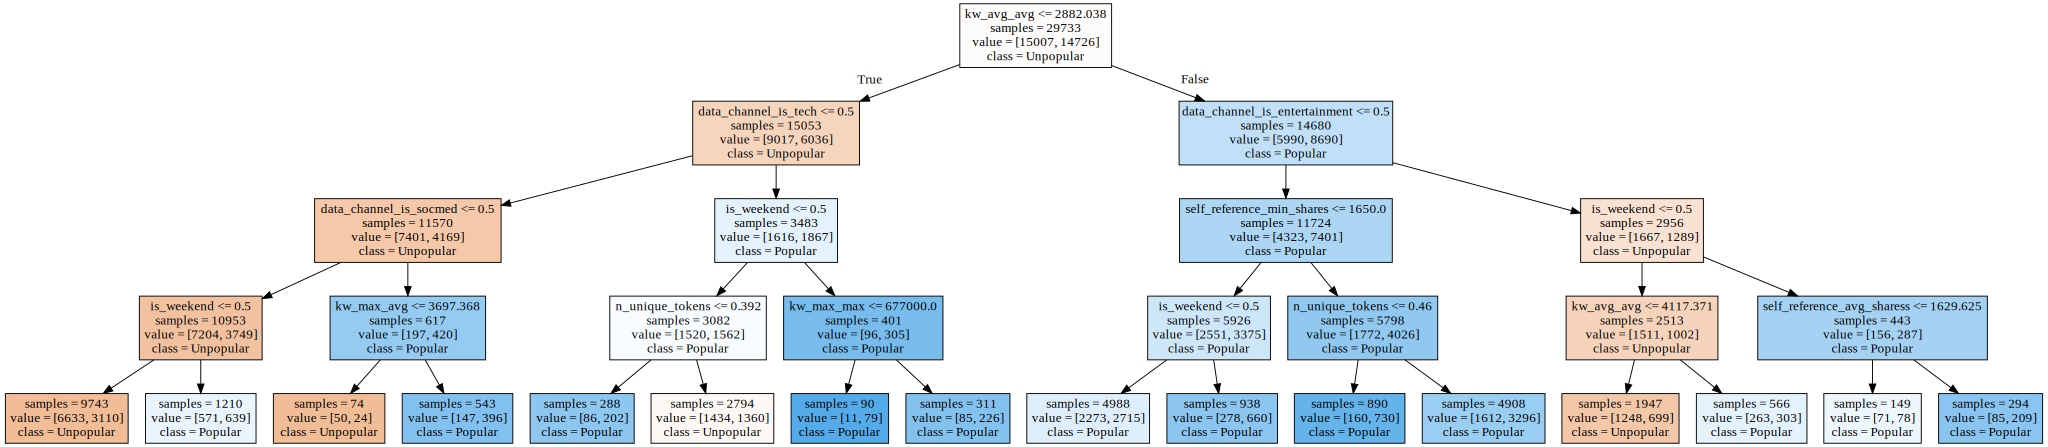

In [86]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
from IPython.display import Image 


In [87]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.     0.     0.039  0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.124  0.     0.092  0.114  0.     0.     0.     0.     0.     0.002
  0.     0.     0.015  0.391  0.063  0.     0.005  0.     0.     0.     0.
  0.     0.     0.     0.156  0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.   ]


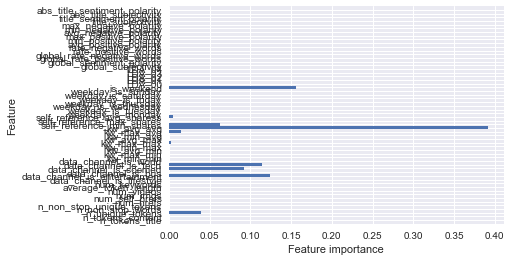

In [88]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)



In [89]:


for name, importance in zip(X_train.columns.values, tree.feature_importances_):
    print(name, importance)


# get importances from RF
importances = tree.feature_importances_
print(importances)
indice = np.argsort(importances)
print(indice)
indices=indice[45:57]
print(indices)




n_tokens_title 0.0
n_tokens_content 0.0
n_unique_tokens 0.0394182490674
n_non_stop_words 0.0
n_non_stop_unique_tokens 0.0
num_hrefs 0.0
num_self_hrefs 0.0
num_imgs 0.0
num_videos 0.0
average_token_length 0.0
num_keywords 0.0
data_channel_is_lifestyle 0.0
data_channel_is_entertainment 0.123645916521
data_channel_is_bus 0.0
data_channel_is_socmed 0.0919526003278
data_channel_is_tech 0.11359540171
data_channel_is_world 0.0
kw_min_min 0.0
kw_max_min 0.0
kw_avg_min 0.0
kw_min_max 0.0
kw_max_max 0.00219009605707
kw_avg_max 0.0
kw_min_avg 0.0
kw_max_avg 0.0146791267974
kw_avg_avg 0.391314819745
self_reference_min_shares 0.0627911952897
self_reference_max_shares 0.0
self_reference_avg_sharess 0.00477285510709
weekday_is_monday 0.0
weekday_is_tuesday 0.0
weekday_is_wednesday 0.0
weekday_is_thursday 0.0
weekday_is_friday 0.0
weekday_is_saturday 0.0
weekday_is_sunday 0.0
is_weekend 0.155639739377
LDA_00 0.0
LDA_01 0.0
LDA_02 0.0
LDA_03 0.0
LDA_04 0.0
global_subjectivity 0.0
global_sentiment_polar

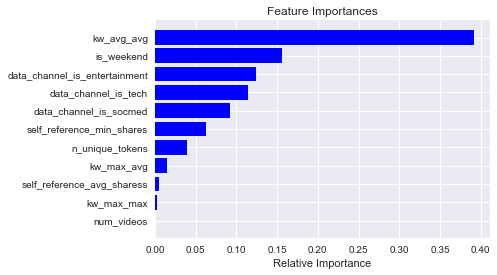

In [90]:

# get importances from RF
importances = tree.feature_importances_

# then sort them descending
indice = np.argsort(importances)
indices=indice[47:58]

# get the features from the original data set
features = X_train.columns.values

# plot them with a horizontal bar chart
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [91]:
forest = RandomForestClassifier(max_depth=4,min_samples_leaf=50,max_features=7,n_estimators=100, random_state=2)
forest.fit(X_train, y_train)


print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.658
Accuracy on test set: 0.648


In [92]:
#overfitting add parameters for tuning
#forest = RandomForestClassifier(n_estimators=100, random_state=0)
#forest.fit(X_train, y_train)

#print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [93]:
#predicting on test data
y_pred = forest.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))



Test set predictions:
 [ 0.  0.  1. ...,  0.  1.  0.]


In [94]:
print ( "Test set score: {:.2f}" . format ( np . mean ( y_pred  ==  y_test )))

Test set score: 0.65


In [95]:
importances = forest.feature_importances_
print(importances)

indice = np.argsort(importances)
print(indice)

[ 0.     0.004  0.013  0.     0.009  0.018  0.001  0.014  0.     0.003
  0.002  0.     0.06   0.001  0.019  0.027  0.051  0.005  0.008  0.014
  0.005  0.01   0.006  0.053  0.091  0.147  0.093  0.04   0.064  0.     0.
  0.     0.     0.     0.02   0.005  0.06   0.009  0.015  0.078  0.004
  0.015  0.005  0.005  0.002  0.001  0.002  0.007  0.001  0.009  0.001
  0.001  0.001  0.     0.001  0.001  0.     0.   ]
[ 3 32 31 30 29 11  8 33 53 56 57  0 52 54 51 55  6 45 50 13 48 44 10 46  9
 40  1 42 20 17 35 43 22 47 18 49  4 37 21  2 19  7 41 38  5 14 34 15 27 16
 23 36 12 28 39 24 26 25]


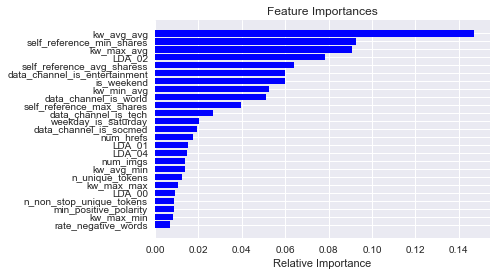

In [96]:
# get importances from RF
importances = forest.feature_importances_

# then sort them descending
indice = np.argsort(importances)
indices=indice[33:58]

# get the features from the original data set
features = X_train.columns.values

# plot them with a horizontal bar chart
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('test.pdf')

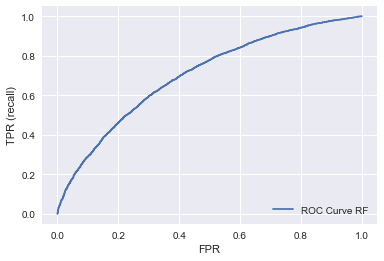

In [97]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


plt.legend(loc=4)

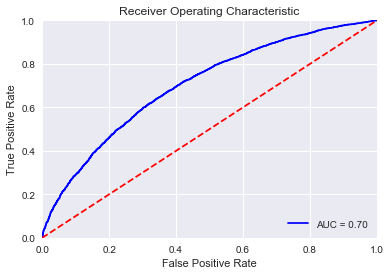

In [123]:
# calculate the fpr and tpr for all thresholds of the classification
probs = forest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

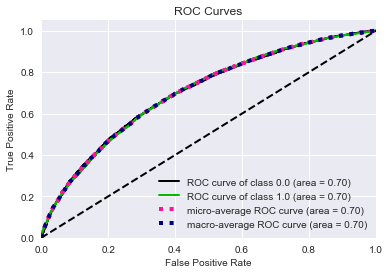

In [124]:
probs = forest.predict_proba(X_test)

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, probs)
plt.show()

In [99]:
#Boosting tree model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))





Accuracy on training set: 0.684
Accuracy on test set: 0.664


In [100]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.657
Accuracy on test set: 0.651


In [107]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.05)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.674
Accuracy on test set: 0.659


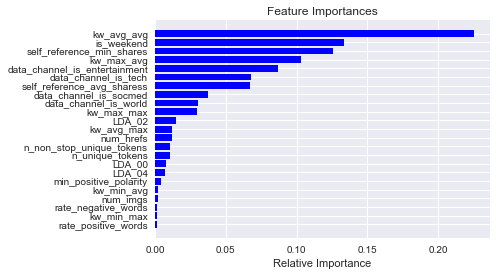

In [102]:
# get importances from RF
importances = gbrt.feature_importances_

# then sort them descending
indice = np.argsort(importances)
indices=indice[35:58]

# get the features from the original data set
features = X_train.columns.values

# plot them with a horizontal bar chart
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

plt.savefig('test.pdf')

In [120]:
adagbrt = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.05,max_depth=2)
adagbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.674
Accuracy on test set: 0.659


In [142]:
from sklearn.feature_selection import SelectPercentile
#Automatic Feature Selection
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from  sklearn.metrics  import  classification_report

# transform test data
X_test_selected = select.transform(X_test)

lr1 = LogisticRegression().fit(X_train, y_train)
pred_logreg1  =  lr1.predict(X_test)
print("Score with all features: {:.3f}".format(lr1.score(X_test, y_test)))
lr2=LogisticRegression().fit(X_train_selected, y_train)
pred_logreg  =  lr2.predict(X_test_selected)
print("Score with only selected features: {:.3f}".format(
    lr2.score(X_test_selected, y_test)))

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

print("f1 score logistic regression with only selcted features: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

print ( classification_report (y_test,pred_logreg , target_names = [ "Unpopular" ,  "Popular" ]))

X_train.shape: (29733, 58)
X_train_selected.shape: (29733, 29)
Score with all features: 0.609
Score with only selected features: 0.641
Confusion matrix:
[[3272 1803]
 [1757 3079]]
f1 score logistic regression with only selcted features: 0.63
             precision    recall  f1-score   support

  Unpopular       0.65      0.64      0.65      5075
    Popular       0.63      0.64      0.63      4836

avg / total       0.64      0.64      0.64      9911



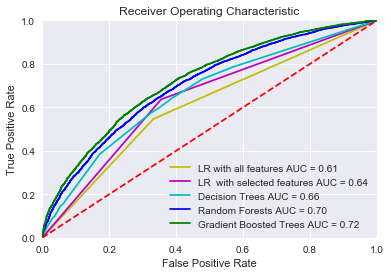

In [146]:
# calculate the fpr and tpr for all thresholds of the classification
probs = forest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


probs1 = adagbrt.predict_proba(X_test)
preds1 = probs1[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

probs2 = tree.predict_proba(X_test)
preds2 = probs2[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)



fpr3, tpr3, threshold = metrics.roc_curve(y_test, pred_logreg)
roc_auc3 = metrics.auc(fpr3, tpr3)

fpr4, tpr4, threshold = metrics.roc_curve(y_test, pred_logreg1)
roc_auc4 = metrics.auc(fpr4, tpr4)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr4, tpr4, 'y', label = 'LR with all features AUC = %0.2f' % roc_auc4)
plt.plot(fpr3, tpr3, 'm', label = 'LR  with selected features AUC = %0.2f' % roc_auc3)
plt.plot(fpr2, tpr2, 'c', label = 'Decision Trees AUC = %0.2f' % roc_auc2)
plt.plot(fpr, tpr, 'b', label = 'Random Forests AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'Gradient Boosted Trees AUC = %0.2f' % roc_auc1)


#plt.plot(fpr, tpr, 'b', label = 'Logistic Regression AUC = %0.2f' % roc_auc)
#plt.plot(fpr1, tpr1, 'g', label = 'Decision Trees AUC = %0.2f' % roc_auc1)
#plt.plot(fpr2, tpr2, 'c', label = 'Random Forest AUC = %0.2f' % roc_auc2)
#plt.plot(fpr3, tpr3, 'm', label = 'Gradient Boosted Trees AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

TypeError: 'AxesSubplot' object is not callable

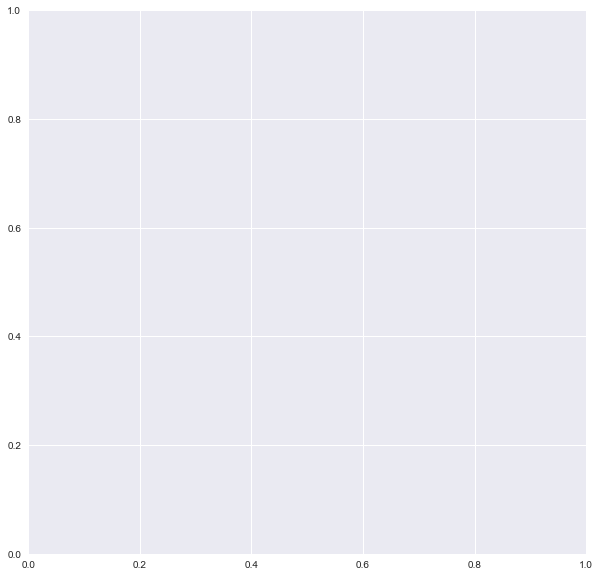

In [145]:
fig, ax = plt.subplots(figsize=(10,  10))
X_train.boxplot(['rate_negative_words', 'min_negtive_polarity', 'max_negative_polarity'],  ax)

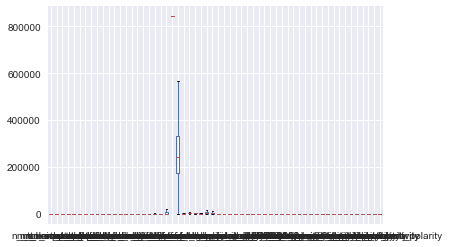

In [105]:
X_train.boxplot()
plt.show()

In [ ]:
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)